In [37]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from main import load_and_prepare_sessions
from processing.session_sampling import MiceAnalysis
from data.mouse import create_mice_dict
import matplotlib.pyplot as plt
from plotting.main_plotting import plot_session_events_and_signal
from config import all_brain_regions, all_event_types

sessions = load_and_prepare_sessions("../../trial_cohort2", load_from_pickle=True, remove_bad_signal_sessions=True)
mouse_analyser = MiceAnalysis(sessions)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
mice_dict = create_mice_dict(sessions)

In [39]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.signal import savgol_filter
import numpy as np

In [40]:
# for session in sessions:
#     drug_info = session.drug_info
#     if drug_info['name'] == 'Vehicle':
#         dose = 0
#     elif drug_info['name'] == 'CNO':
#         dose = float(drug_info['dose'])
    

#     fig = make_subplots(rows=1, cols=1)
#     brain_reg = session.brain_regions[-1]
#     plot_session_events_and_signal(session, brain_reg, fig, row=1, col=1, title_suffix=f'{session.mouse_id}, {dose}, {session.genotype}')
#     fig.show()

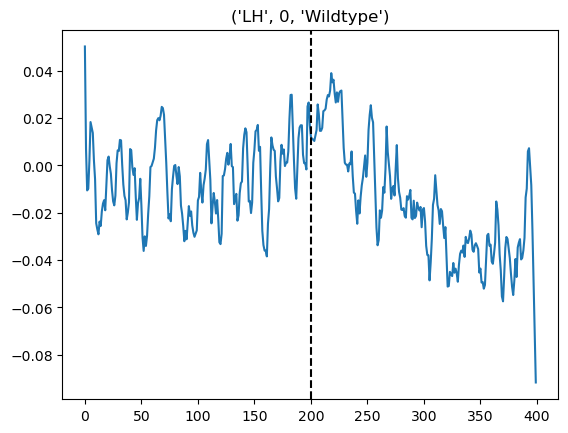

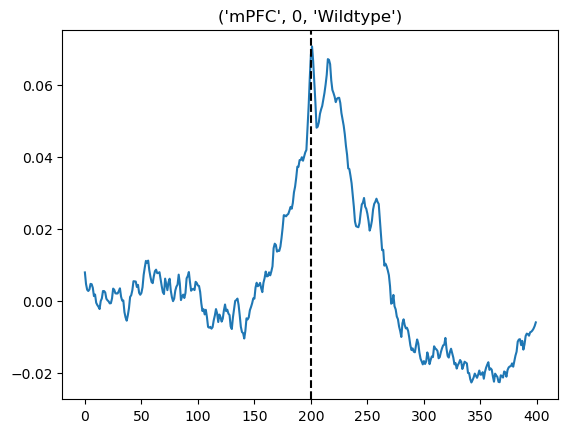

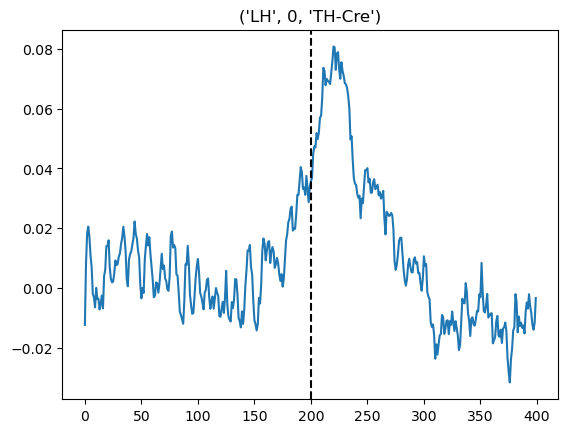

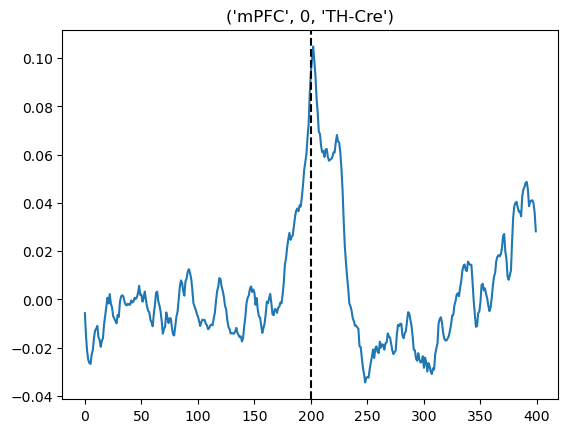

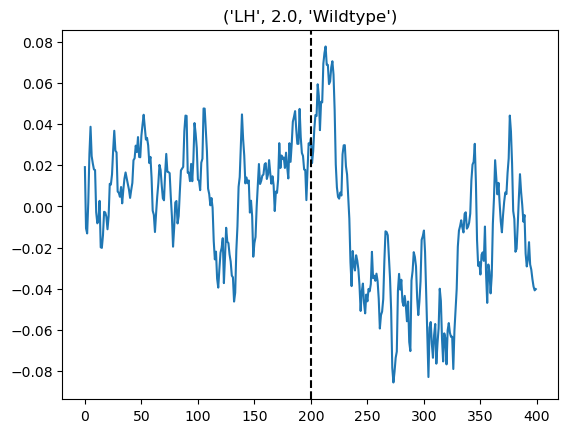

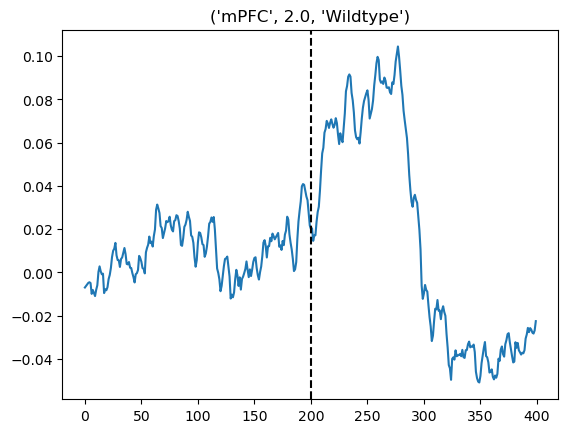

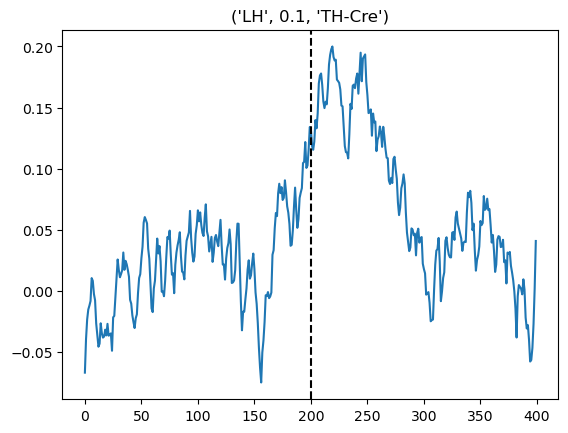

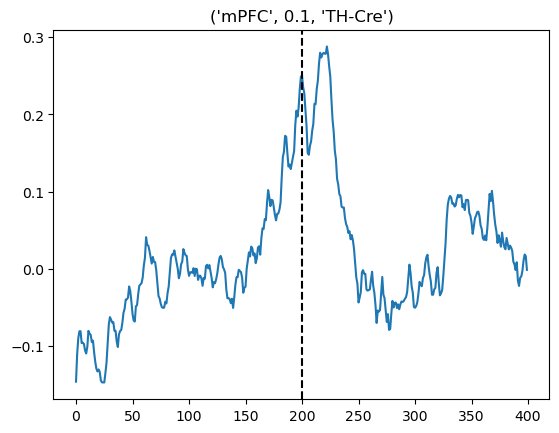

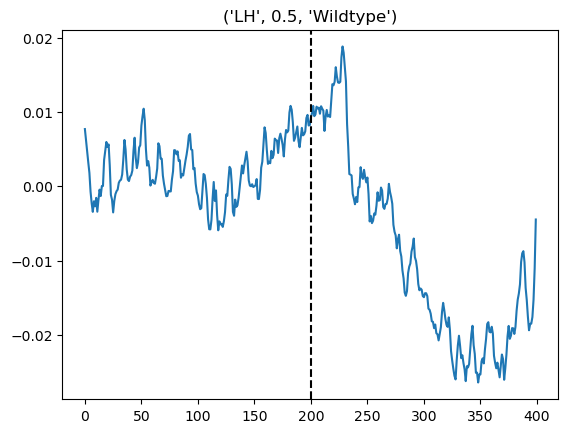

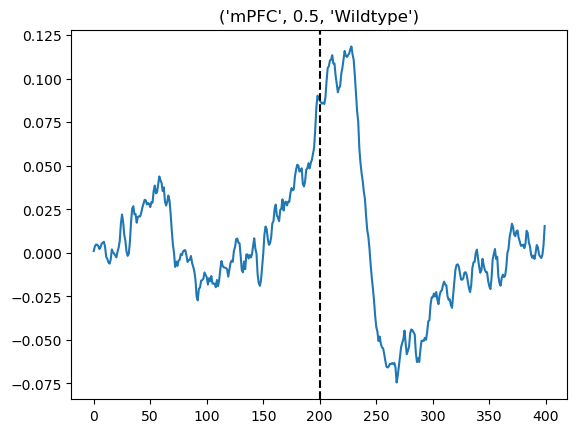

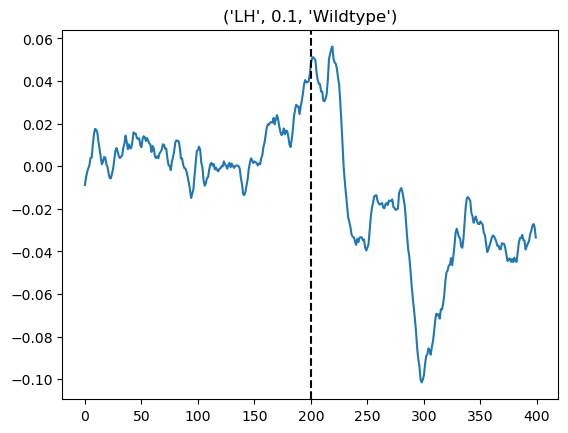

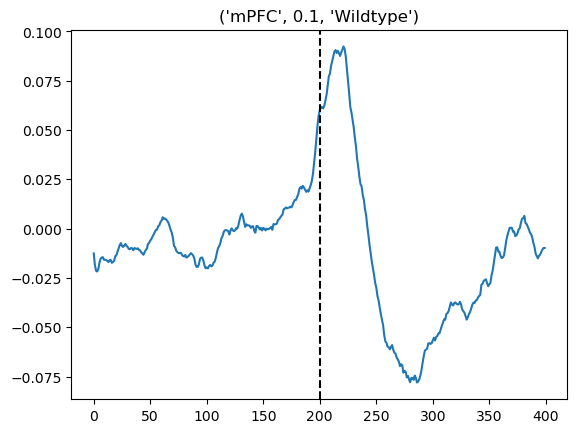

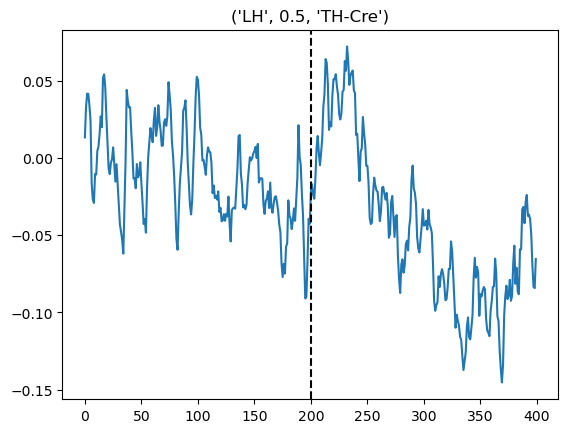

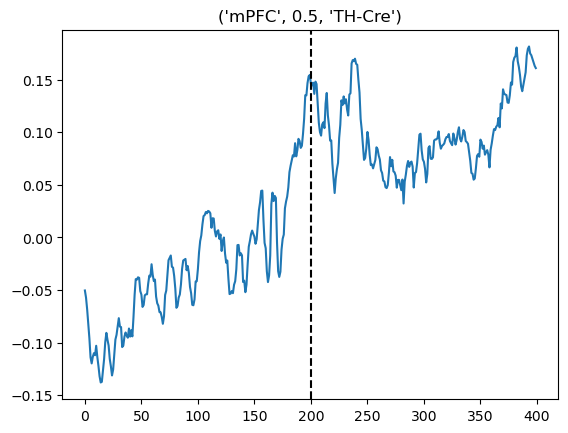

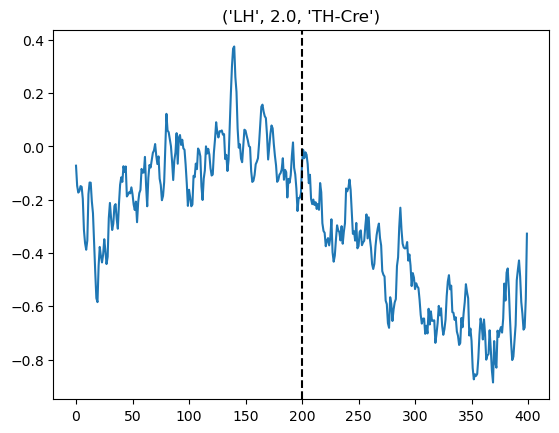

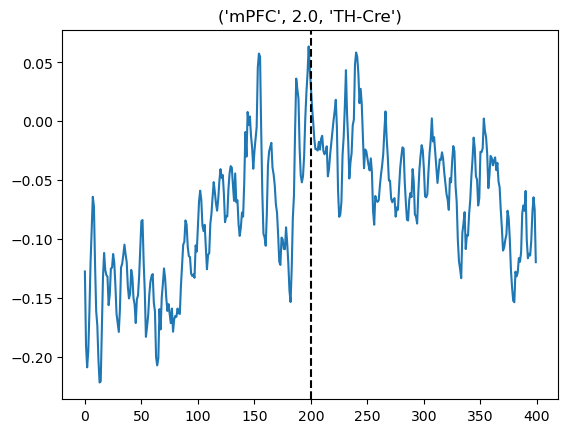

In [50]:
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

all_signal_matrices = defaultdict(list)

for session in sessions:
    drug_info = session.drug_info
    if (name := drug_info['name']) == 'Vehicle':
        dose = 0
    elif name == 'CNO':
        dose = float(drug_info['dose'])
        
    for brain_reg in all_brain_regions:
        signal_matrix = session.signal_info[(brain_reg, 'hit')]['signal_matrix']
        mean_signal = np.mean(signal_matrix, axis=0)
        
        # Apply smoothing
        smoothed_mean_signal = savgol_filter(mean_signal, 10, 3)

        # Plot the smoothed mean signal
        # plt.plot(smoothed_mean_signal)
        all_signal_matrices[(brain_reg, dose, session.genotype)].append(smoothed_mean_signal)
        # plt.title(f'Hit, Brain Region: {brain_reg}, Dose: {dose}, Genotype: {session.genotype}')
        # plt.show()

for keys, values in all_signal_matrices.items():
    stacked_vectors = np.stack(values)
    elementwise_mean = np.mean(stacked_vectors, axis=0)
    plt.plot(elementwise_mean)
    plt.title(keys)
    plt.axvline(x=200, color='black', linestyle='--')  # Add a vertical striped line at x=200
    plt.show()
